In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://bit.ly/datasetA')

In [8]:
df.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:
df.isnull().sum()

Unnamed: 0               0
Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                2198
Hospital                 0
Insurance Provider    2193
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication            5417
Test Results             0
dtype: int64

In [10]:
df.isnull().any(axis=1).sum()

9281

In [11]:
male_data = df[df['Gender'] == 'Male']

# Calculate average age
average_age_male = male_data['Age'].mean()

print(f"The average age of males is: {average_age_male:.2f}")

The average age of males is: 51.50


In [12]:
female_data = df[df['Gender'] == 'Female']

# Calculate average age
average_age_female = female_data['Age'].mean()

print(f"The average age of females is: {average_age_female:.2f}")

The average age of females is: 51.58


In [13]:
# Count the patient that is given Ibuprofen
count = df['Medication'].value_counts()['Ibuprofen']

print(count)

10060


In [14]:
# Replacing with most frequent
most_frequent_medication = df['Medication'].mode()[0] 
df['Medication'].fillna(most_frequent_medication, inplace=True)

most_frequent_doctor = df['Doctor'].mode()[0] 
df['Doctor'].fillna(most_frequent_doctor, inplace=True)

most_frequent_insurance_provider = df['Insurance Provider'].mode()[0] 
df['Insurance Provider'].fillna(most_frequent_insurance_provider, inplace=True)

print(most_frequent_medication)

Ibuprofen


C:\Users\asus\AppData\Local\Temp\ipykernel_41240\3685911773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication'].fillna(most_frequent_medication, inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_41240\3685911773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [15]:
most_frequent_hospital = df['Hospital'].mode()[0] 
print(most_frequent_hospital)

most_frequent_medical_condition = df['Medical Condition'].mode()[0] 
print(most_frequent_medical_condition)

LLC Smith
Arthritis


C:\Users\asus\AppData\Local\Temp\ipykernel_41240\710861870.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df['Age'] <= 15]['Billing Amount'],


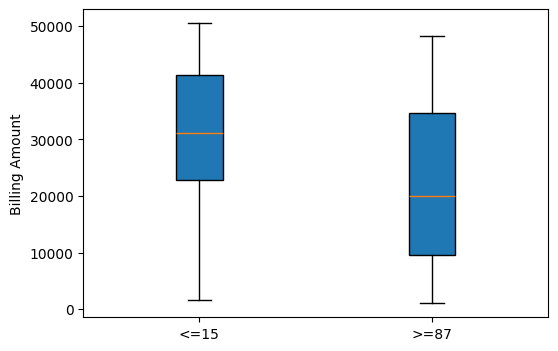

In [16]:
plt.figure(figsize=(6, 4))

box = plt.boxplot([df[df['Age'] <= 15]['Billing Amount'], 
                   df[df['Age'] >= 87]['Billing Amount']],
            labels=['<=15', '>=87'],
            patch_artist=True,
            widths=0.2)

plt.ylabel('Billing Amount')
plt.show()

Text(0, 0.5, 'Frequency')

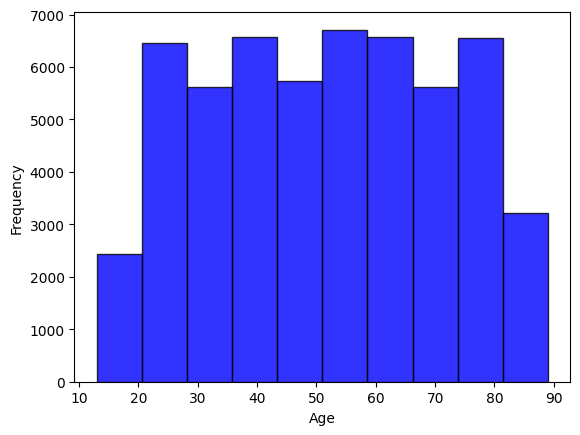

In [22]:
plt.hist(df['Age'], bins=10, color='blue', alpha=0.8, edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [18]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [19]:
df['Month'] = df['Date of Admission'].dt.month
df.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,8
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,9
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,11
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,9


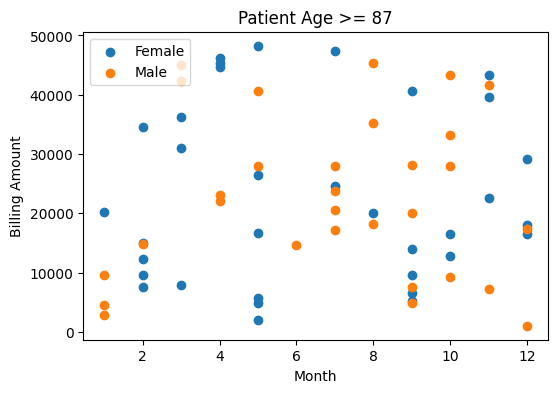

In [20]:
filtered_data = df[df['Age'] >= 87]

plt.figure(figsize=(6, 4))
plt.title('Patient Age >= 87')
plt.xlabel('Month')
plt.ylabel('Billing Amount')
for gender, group in filtered_data.groupby('Gender'):
    plt.scatter(group['Month'], group['Billing Amount'], label=gender)
plt.legend(loc='upper left')
plt.show()